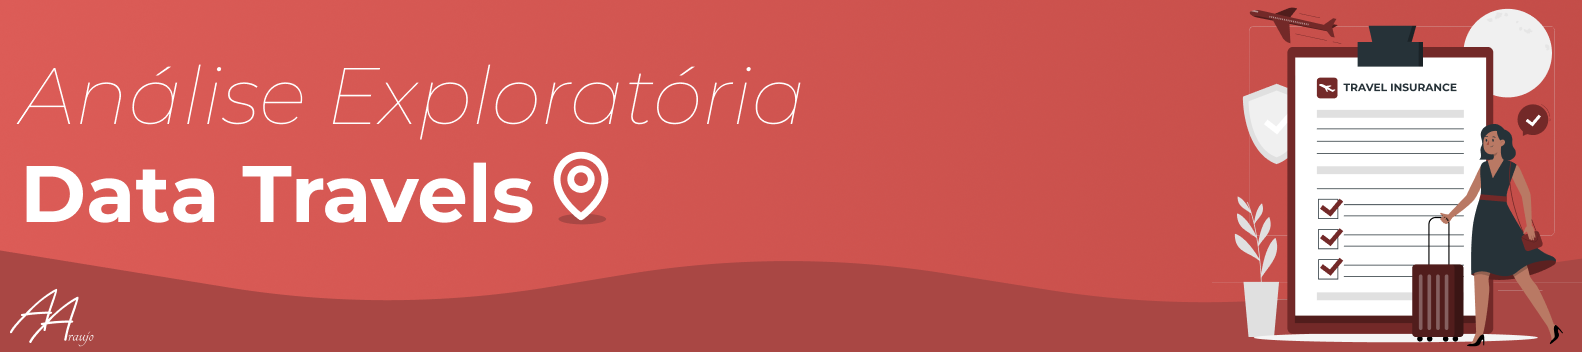

# Exploração de dados People Analytics

<span style="font-size: 14px;">A Data Travels é uma empresa que vende pacotes de viagens e tem o objetivo de melhorar a compreensão de seus dados de vendas, identificar oportunidades de crescimento e otimizar suas estratégias de marketing.</span>

<span style="font-size: 14px;">Base de dados: Dados sintéticos disponibilizados no Power Bi Discovery (Karine Lago e Letícia S.)</span>

In [3]:
-- Visualizando a base de dados
SELECT TOP (10) * FROM dados_travels

(10 rows affected)

Total execution time: 00:00:00.017

id_da_compra,data_da_compra,id_do_cliente,nome_do_cliente,País,Destino,tipo_viagem,Valor_por_pessoa,Quantidade_de_pessoas,forma_de_pagamento,Canal_de_vendas,Vendedor
PED61V,2023-07-22 00:00:00.0000000,49841,Davi Miguel Pinto,Brasil,Amazônia,nacional,7074,3,Parcelado 12x,PRE,Samuel Caldeira
QCISD3,2022-02-03 00:00:00.0000000,71441,Esther Rodrigues,Brasil,Amazônia,nacional,100285,2,Parcelado 3x,PRE,Samuel Caldeira
U8JNTB,2024-02-01 00:00:00.0000000,56932,Ana Clara Souza,Brasil,Amazônia,nacional,294685,3,Parcelado 12x,PRE,Sara Melo
UDQJ1S,2024-02-15 00:00:00.0000000,55647,Emanuella Andrade,Brasil,Amazônia,nacional,113819,2,Parcelado 12x,ON,Website
F00R9N,2023-04-17 00:00:00.0000000,64675,Lucas Gabriel Casa Grande,Brasil,Amazônia,nacional,90351,3,Parcelado 6x,ON,Website
5JJR8O,2024-04-02 00:00:00.0000000,17563,Pietro Rezende,Brasil,Amazônia,nacional,179672,3,Parcelado 12x,ON,Website
50DRZQ,2022-05-10 00:00:00.0000000,72637,Bárbara Azevedo,Brasil,Amazônia,nacional,48459,3,Parcelado 12x,ON,Website
PYN6ZE,2023-12-11 00:00:00.0000000,12095,Josué Cirino,Brasil,Amazônia,nacional,42351,2,Parcelado 12x,PRE,José Monteiro
9ZNBXG,2023-02-21 00:00:00.0000000,54273,Ravi Lucca Carvalho,Brasil,Amazônia,nacional,93386,3,Parcelado 12x,PRE,Agatha Lopes
STORTW,2024-02-11 00:00:00.0000000,92089,Felipe Aparecida,Brasil,Amazônia,nacional,207941,2,Parcelado 12x,ON,Website


In [27]:
-- Total de Receita por ano
SELECT 
    YEAR(data_da_compra) AS 'Ano',
    FORMAT(SUM(Valor_por_pessoa * Quantidade_de_pessoas),'c','pt-BR') AS 'Total Receita'
FROM dados_travels
GROUP BY YEAR(data_da_compra)
ORDER BY Ano DESC

(4 rows affected)

Total execution time: 00:00:00.053

Ano,Total Receita
2024,"R$ 9.957.393.178,00"
2023,"R$ 22.306.872.897,00"
2022,"R$ 12.483.099.994,00"
2021,"R$ 4.938.464.098,00"


In [26]:
-- Receita total por ano
SELECT 
    YEAR(data_da_compra) AS 'Ano',
    FORMAT(SUM(Valor_por_pessoa),'N0','de-DE') AS 'Total Passageiros'
FROM dados_travels
GROUP BY YEAR(data_da_compra)
ORDER BY Ano DESC

(4 rows affected)

Total execution time: 00:00:00.040

Ano,Total Passageiros
2024,4.024.236.131
2023,9.127.374.274
2022,5.074.727.045
2021,2.038.044.545


In [ ]:
-- Criação de uma view auxiliar para as próximas perguntas de negócio
CREATE VIEW receita_ano AS
SELECT
    YEAR(data_da_compra) AS 'Ano',
    MONTH(data_da_compra) AS 'Mes',
    SUM(Quantidade_de_pessoas * Valor_por_pessoa) AS 'Total Receita'
FROM dados_travels
GROUP BY YEAR(data_da_compra), MONTH(data_da_compra)

In [100]:
-- Complemento da view anterior
CREATE OR ALTER VIEW receita_total AS
SELECT
    Ano, 
    Mes,
    [Total Receita] AS [Receita Total],
    FORMAT(1.0 * [Total Receita]/SUM([Total Receita])OVER(PARTITION BY Ano),'0.00%') AS 'Percentual',
    ([Total Receita] - LAG([Total Receita],1)OVER(ORDER BY Ano ASC, Mes ASC))/[Total Receita] AS 'MoM'
FROM receita_ano

Commands completed successfully.

Total execution time: 00:00:00.007

In [101]:
-- Receita gerada ao longo dos meses por ano
SELECT
    Ano,
    Mes,
    [Receita Total],
    Percentual
FROM receita_total

(40 rows affected)

Total execution time: 00:00:00.065

Ano,Mes,Receita Total,Percentual
2021,7,485579712,"9,83%"
2021,1,413525233,"8,37%"
2021,4,436893663,"8,85%"
2021,2,376513291,"7,62%"
2021,10,390246138,"7,90%"
2021,11,442292558,"8,96%"
2021,5,430522998,"8,72%"
2021,8,413587794,"8,37%"
2021,9,402265726,"8,15%"
2021,3,337544851,"6,84%"


In [102]:
-- Qual mês de qual ano a Data Travel obteve a maior Receita? 
SELECT 
    Ano,
    Mes,
    FORMAT([Receita Total], 'c') AS [Maior Receita]
FROM receita_total
WHERE [Receita Total] = (SELECT MAX([Receita Total]) FROM receita_total)

(1 row affected)

Total execution time: 00:00:00.093

Ano,Mes,Maior Receita
2024,1,"R$ 2.575.627.663,00"


In [103]:
-- Qual mês de qual ano a Data Travel obteve a menor Receita? 
SELECT 
    Ano,
    Mes,
    FORMAT([Receita Total],'c') AS [Menor Receita]
FROM receita_total
WHERE [Receita Total] = (SELECT MIN([Receita Total]) FROM receita_total)

(1 row affected)

Total execution time: 00:00:00.083

Ano,Mes,Menor Receita
2021,3,"R$ 337.544.851,00"


In [109]:
-- Qual mês/ano apresentou a maior variação percentual de Receita
SELECT 
    Ano,
    Mes,
    FORMAT([Receita Total],'c') AS [Menor Receita],
    FORMAT(MoM,'0.00%') AS [Max MoM]
FROM receita_total
WHERE MoM = (SELECT MAX(MoM) FROM receita_total)

Aviso: o valor nulo é eliminado por uma agregação ou outra operação SET.

(1 row affected)

Total execution time: 00:00:00.218

Ano,Mes,Menor Receita,Max MoM
2022,1,"R$ 1.018.274.531,00","60,83%"


In [110]:
-- Qual mês/ano apresentou a menor variação percentual de Receita
SELECT 
    Ano,
    Mes,
    FORMAT([Receita Total],'c') AS [Menor Receita],
    FORMAT(MoM,'0.00%') AS [Min MoM]
FROM receita_total
WHERE MoM = (SELECT MIN(MoM) FROM receita_total)

Aviso: o valor nulo é eliminado por uma agregação ou outra operação SET.

(1 row affected)

Total execution time: 00:00:00.107

Ano,Mes,Menor Receita,Min MoM
2022,10,"R$ 968.502.823,00","-18,31%"
